# Results presentation
In this notebook, the outputs of the experiment folders are loaded for visualization purposes. The analysis made by trec_eval shows the MAP for each query and the overall MAP. When executing the notebook, all the plots get saved in the `plots/` directory.

## Imports, initialization of constants, general set-up

In [5]:
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd


DATASETS = ["cacm", "med", "npl"]
!mkdir -p plots/

## Plotting functions

In [6]:
def scatter_plot(result_file_names, axis_descriptions, title, fig_filename=""):
    figure, axis = plt.subplots(1, 3, figsize=(14, 5))
    for i, dataset in enumerate(DATASETS):
        # load results from trec_eval format
        x = pd.read_csv(result_file_names[0] % dataset, sep="\t", header=None).sort_values(by=[1])[2].to_numpy()
        y = pd.read_csv(result_file_names[1] % dataset, sep="\t", header=None).sort_values(by=[1])[2].to_numpy()

        # plot the results nicely
        axis[i].set_aspect(1)
        axis[i].scatter(x[:-1], y[:-1], c="m", label="Score for each query")
        axis[i].scatter(x[-1], y[-1], s=[200], c="c", label="Average score")
        axis[i].plot(np.linspace(-0.025, 1.025), np.linspace(-0.025, 1.025), label="Identity line", c="orange", alpha=0.75)
        axis[i].set_xlim(-0.025, 1.025)
        axis[i].set_ylim(-0.025, 1.025)
        axis[i].set_xlabel(axis_descriptions[0])
        axis[i].set_ylabel(axis_descriptions[1])
        axis[i].set_title(f"{dataset} dataset")
        axis[i].legend()
    
    # remove unnecessary white space on the plot
    plt.subplots_adjust(left=0.05, bottom=0.05, right=0.98, top=0.91)
    figure.suptitle(title, fontsize=16)

    # save the plot if a file is specified
    if fig_filename:
        plt.savefig(fig_filename, dpi=300)
    plt.show()


def bar_chart_plot(x_input_template, y_input_template, legend_names, barchart_name, fig_filename=""):
    # Create an empty list to store the data frames
    df_list_one = []
    df_list_two = []

    # Iterate over the input files
    for dataset in DATASETS:
        # Read the file into a data frame
        df = pd.read_csv(x_input_template % dataset, sep='\t', names=['map', 'index', 'value'])

        # Extract the rows with the 'all' index
        df_all = df[df['index'] == 'all']
        value = df_all['value'].iloc[0]
        # Add the data frame to the list
        df_list_one.append(value)

        # Read the file into a data frame
        df = pd.read_csv(y_input_template % dataset, sep='\t', names=['map', 'index', 'value'])

        # Extract the rows with the 'all' index
        df_all = df[df['index'] == 'all']
        value = df_all['value'].iloc[0]
        # Add the data frame to the list
        df_list_two.append(value)


    # Create a data frame with the values and names
    df = pd.DataFrame({'values_one': df_list_one, 'values_two': df_list_two, 'names': DATASETS})

    # Set the bar width
    bar_width = 0.4

    # Calculate the x-coordinates for the bars
    x = range(len(df))

    # Create the plot
    fig, ax = plt.subplots()
    ax.bar(x, df['values_one'], width=bar_width, label=legend_names[0], color='m')
    ax.bar([i + bar_width for i in x], df['values_two'], width=bar_width, label=legend_names[1], color='c')
    ax.set_ylabel("Mean Average Precision")
    ax.set_title(barchart_name)
    ax.set_xticks([i + bar_width / 2 for i in x], df['names'])
    ax.legend()

    if fig_filename:
        plt.savefig(fig_filename, dpi=300)
    plt.show()


def bar_chart_plot_4_in_1(x_input_templates, y_input_templates, legend_names, barchart_name, fig_filename=""):
    
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    for i, (x_input_template, y_input_template) in enumerate(zip(x_input_templates, y_input_templates)):
        # Create an empty list to store the data frames
        df_list_one = []
        df_list_two = []

        # Iterate over the input files
        for dataset in DATASETS:
            # Read the file into a data frame
            df = pd.read_csv(x_input_template % dataset, sep='\t', names=['map', 'index', 'value'])

            # Extract the rows with the 'all' index
            df_all = df[df['index'] == 'all']
            value = df_all['value'].iloc[0]
            # Add the data frame to the list
            df_list_one.append(value)

            # Read the file into a data frame
            df = pd.read_csv(y_input_template % dataset, sep='\t', names=['map', 'index', 'value'])

            # Extract the rows with the 'all' index
            df_all = df[df['index'] == 'all']
            value = df_all['value'].iloc[0]
            # Add the data frame to the list
            df_list_two.append(value)


        # Create a data frame with the values and names
        df = pd.DataFrame({'values_one': df_list_one, 'values_two': df_list_two, 'names': DATASETS})

        # Set the bar width
        bar_width = 0.4

        # Calculate the x-coordinates for the bars
        x = range(len(df))

        # Create the plot
        j = i // 2
        k = i & 1
        ax[j, k].bar(x, df['values_one'], width=bar_width, label=legend_names[i][0], color='m')
        ax[j, k].bar([i + bar_width for i in x], df['values_two'], width=bar_width, label=legend_names[i][1], color='c')
        ax[j, k].set_ylabel("Mean Average Precision")
        ax[j, k].set_xticks([i + bar_width / 2 for i in x], df['names'])
        ax[j, k].legend()

    fig.suptitle(barchart_name, fontsize=16)
    plt.subplots_adjust(left=0.055, bottom=0.03, right=0.985, top=0.95, hspace=0.08, wspace=0.15)

    if fig_filename:
        plt.savefig(fig_filename, dpi=300)
    plt.show()

## Task 01
In this task, we compare the BM25 ranking function with the cosine similarity search using embeddings created by different language models from sentence transformers. The behaviour for individual queries and the overall MAP for each dataset can be seen in the scatterplots.

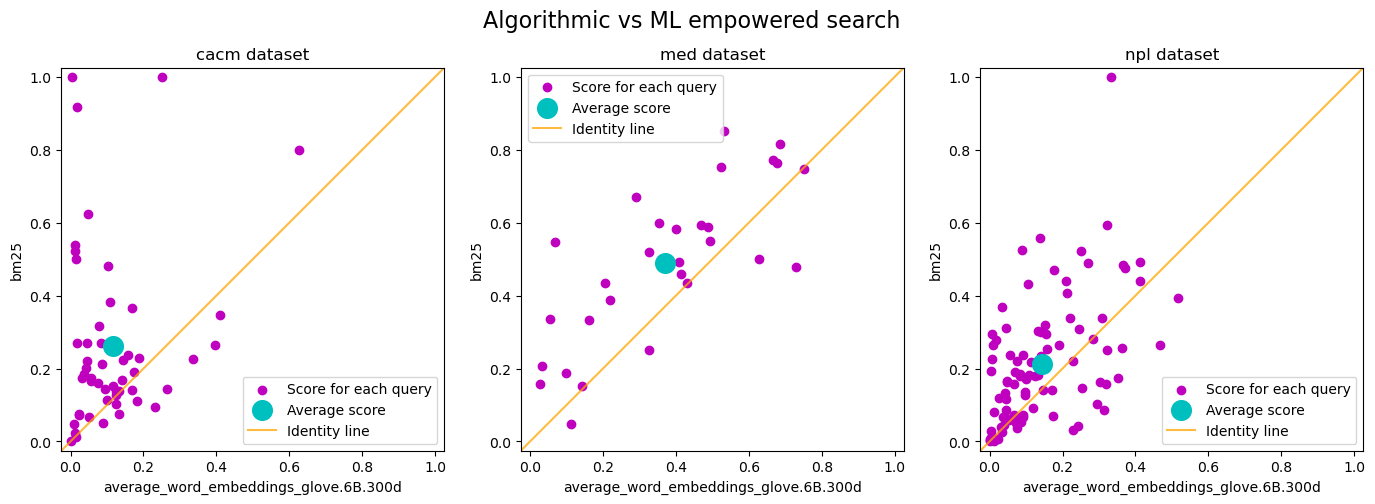

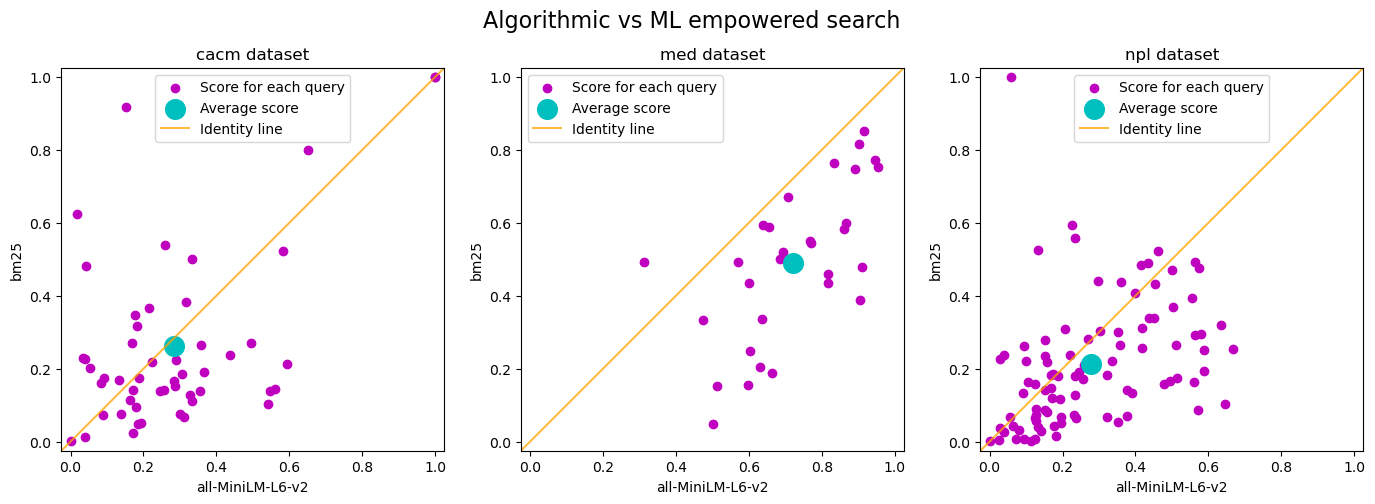

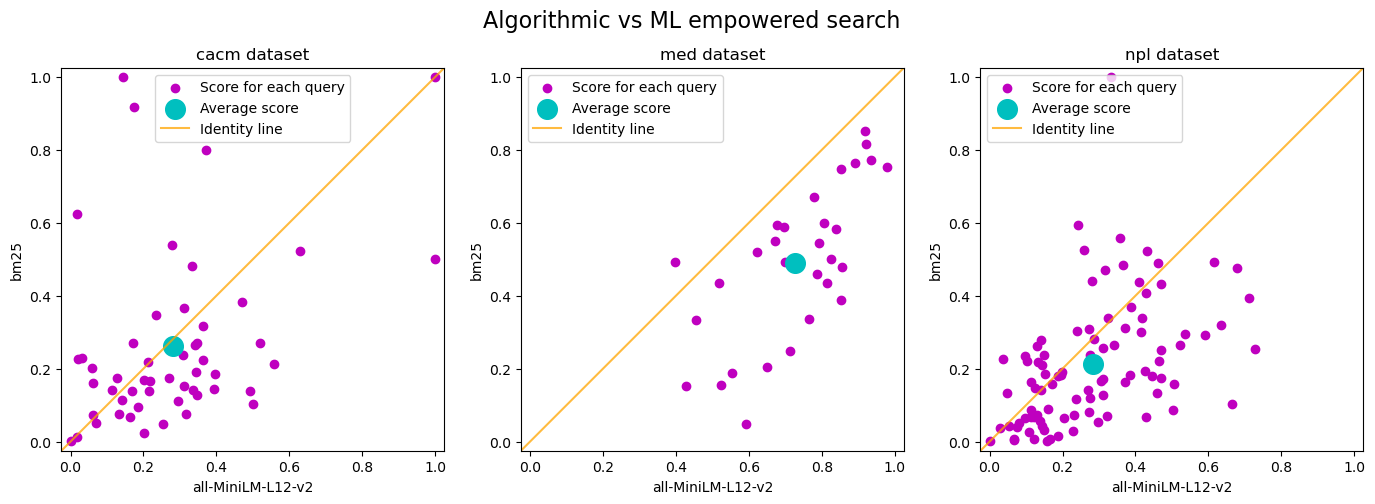

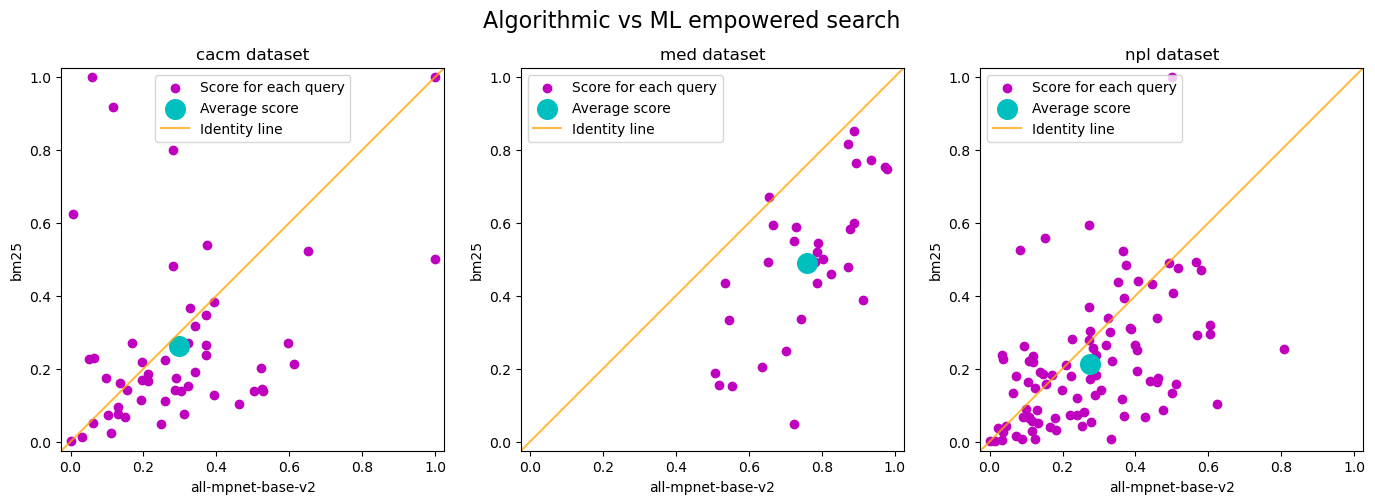

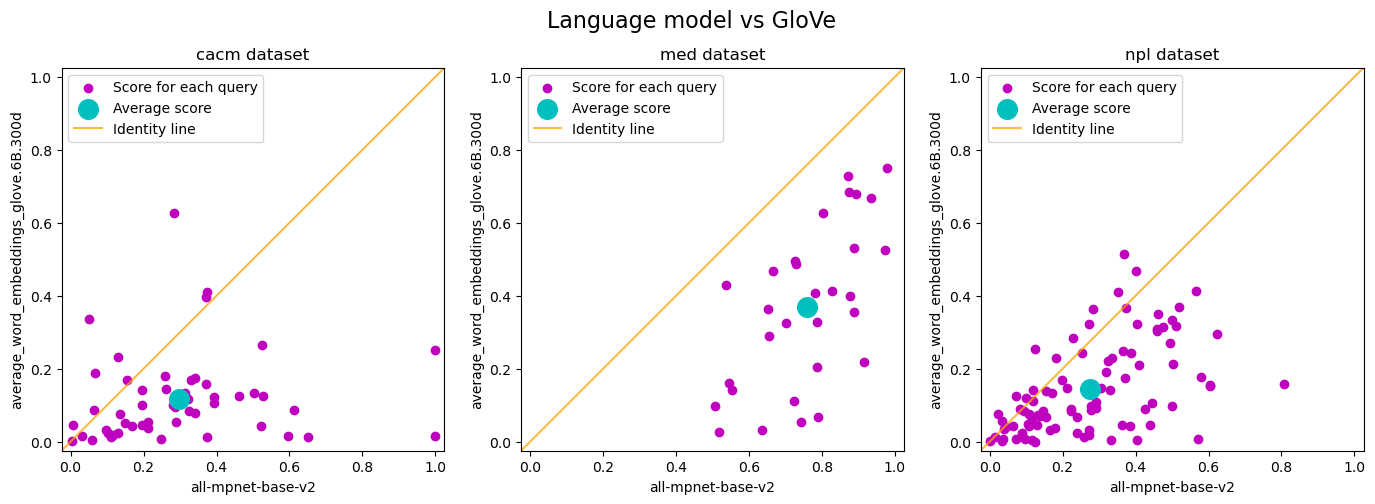

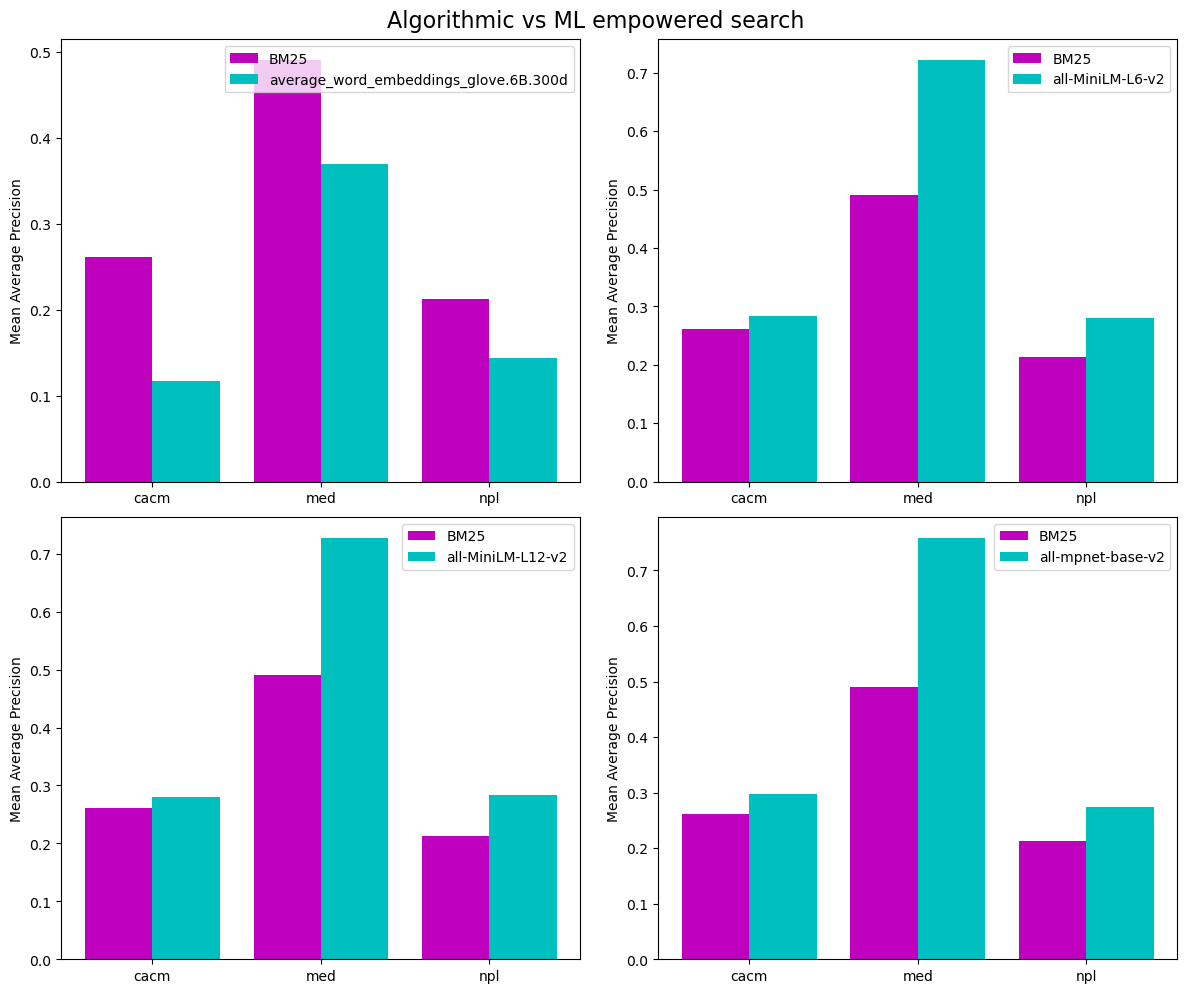

In [7]:
models = ["average_word_embeddings_glove.6B.300d", "all-MiniLM-L6-v2", "all-MiniLM-L12-v2", "all-mpnet-base-v2"]
shortcuts = ["glove", "minil6", "minil12", "mpnetv2"]

for m, s in zip(models, shortcuts):
    # model m vs BM25
    scatter_plot([f"./task_01/results/map_%s_{s}.txt", "./task_01/results/map_%s_bm25.txt"],
                 [m, "bm25"], "Algorithmic vs ML empowered search", f"plots/{s}_vs_bm25")

# glove vs mpnetv2
scatter_plot(["./task_01/results/map_%s_mpnetv2.txt", "./task_01/results/map_%s_glove.txt"],
             ["all-mpnet-base-v2", "average_word_embeddings_glove.6B.300d"],
             "Language model vs GloVe", "plots/glove_vs_mpnetv2")

# bar plot models vs BM25
bar_chart_plot_4_in_1(["./task_01/results/map_%s_bm25.txt"] * 4, 
                      ["./task_01/results/map_%s_glove.txt", "./task_01/results/map_%s_minil6.txt",
                       "./task_01/results/map_%s_minil12.txt", "./task_01/results/map_%s_mpnetv2.txt"], 
                      [["BM25", m] for m in models], 
                      "Algorithmic vs ML empowered search", "plots/task_01_bar_plot")

## Task 02
In this task, we use Google pegasus-xsum to summarize all the data, distilbart-cnn-12-6 to summarize only documents whose length is greater than 700 characters, and compare the results of the unsummarized and summarized versions using BM25.

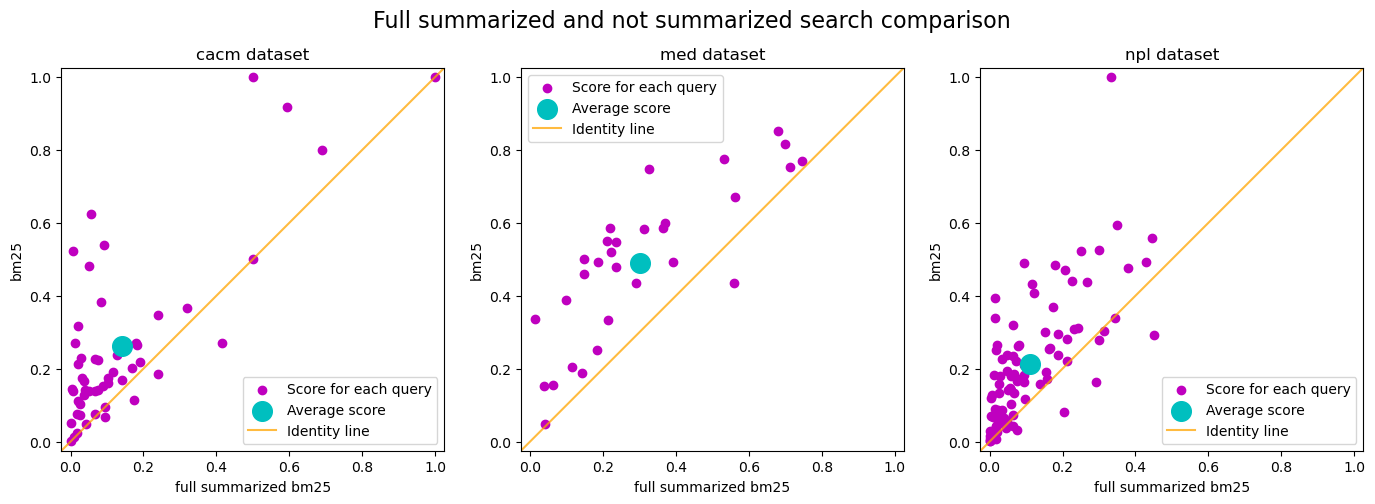

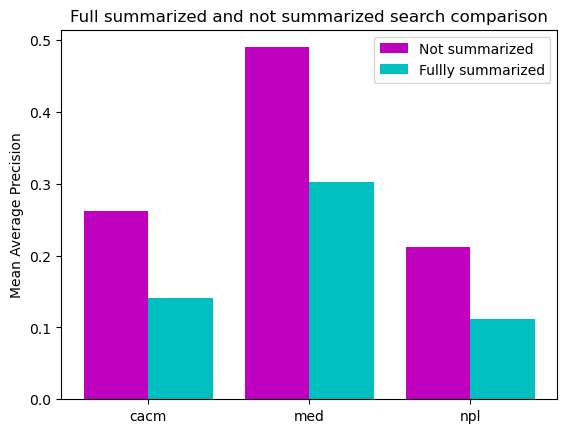

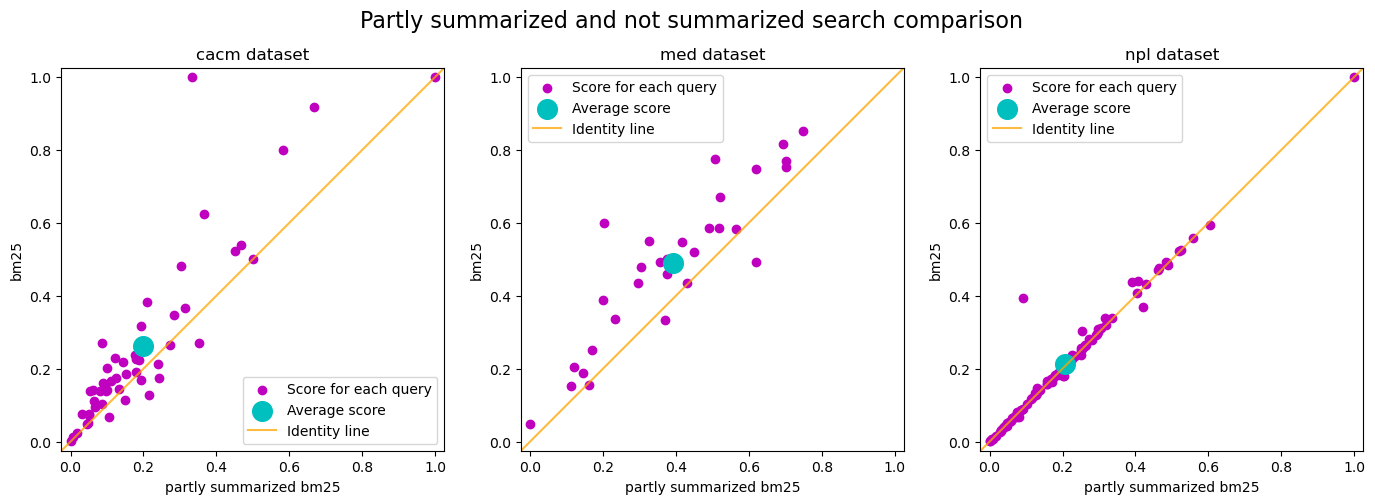

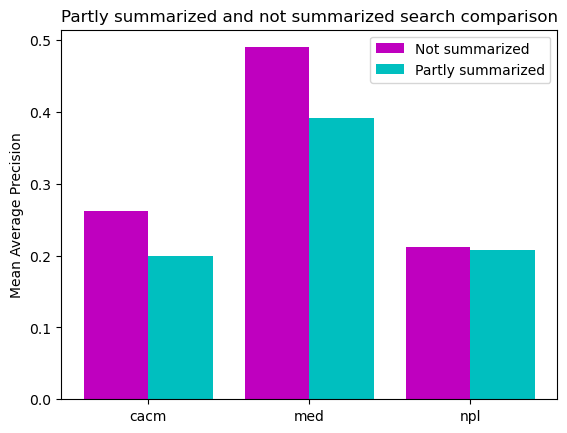

NameError: name 'plot_4_bar_chart' is not defined

In [8]:
# not summarized vs full summarized
scatter_plot(["./task_02/results/map_full_summarized_%s_bm25.txt", "./task_02/results/map_%s_bm25.txt"],
             ["full summarized bm25", "bm25"], "Full summarized and not summarized search comparison", "plots/full_summarized_bm25_vs_bm25")
bar_chart_plot("./task_02/results/map_%s_bm25.txt", "./task_02/results/map_full_summarized_%s_bm25.txt",
               ["Not summarized", "Fullly summarized"], "Full summarized and not summarized search comparison", "plots/full_summarized_bm25_vs_bm25_bar")

# not summarized vs partly summarized
scatter_plot(["./task_02/results/map_partly_summarized_%s_bm25.txt", "./task_02/results/map_%s_bm25.txt"],
             ["partly summarized bm25", "bm25"], "Partly summarized and not summarized search comparison", "plots/partly_summarized_bm25_vs_bm25")
bar_chart_plot("./task_02/results/map_%s_bm25.txt", "./task_02/results/map_partly_summarized_%s_bm25.txt", 
               ["Not summarized", "Partly summarized"], "Partly summarized and not summarized search comparison", "plots/partly_summarized_bm25_vs_bm25_bar")

# plot percentage loss in length and accuracy
plot_4_bar_chart("./task_02/results/summary_strength_vs_accuracy_loss.txt")

## Task 03
In this task, we translate documents and queries from English to German and perform a monolingual search with both BM25 and a language model to see the differences.

In [ ]:
# translated vs not translated BM25
scatter_plot(["./task_03/results/map_ger_%s_bm25.txt", "./task_03/results/map_%s_bm25.txt"],
             ["Pre-translated German bm25", "Original English bm25"], "Translated and not translated search comparison", "plots/translated_not_translated_bm25")
bar_chart_plot("./task_03/results/map_%s_bm25.txt", "./task_03/results/map_ger_%s_bm25.txt",
               ["Original English bm25", "Pre-translated German bm25"], "Translated and not translated search comparison", "plots/translated_not_translated_bm25_bar")

# translated vs not translated ml_minilm_l12_v2
scatter_plot(["./task_03/results/map_ger_%s_ml_minilm_l12_v2.txt", "./task_03/results/map_%s_ml_minilm_l12_v2.txt"],
             ["Pre-translated German ml_minilm_l12_v2", "Original English ml_minilm_l12_v2"],
             "Translated and not translated search comparison", "plots/translated_not_translated_ml_minilm_l12_v2")
bar_chart_plot("./task_03/results/map_%s_ml_minilm_l12_v2.txt", "./task_03/results/map_ger_%s_ml_minilm_l12_v2.txt",
               ["Original English ml_minilm_l12_v2", "Pre-translated German ml_minilm_l12_v2"],
               "Translated and not translated search comparison", "plots/translated_not_translated_ml_minilm_l12_v2_bar")

## Task 04
In this task we evaluated the performance of pre-trained multilingual sentence transformers compared to their monolingual counterparts.

In [ ]:
# multilingual sentence transformers models
models = ["paraphrase-multilingual-MiniLM-L12-v2", "paraphrase-multilingual-mpnet-base-v2"]
shortcuts = ["ml_minilm_l12_v2", "ml_mpnet_base_v2"]

# compare performance of German queries vs English queries on English docs
for shortcut in shortcuts:
    scatter_plot([
        f"./task_04/results/pretrained/map_{shortcut}_%s_DE.txt",
        f"./task_04/results/pretrained/map_{shortcut}_%s_EN.txt"
    ], [f"{shortcut}_DE", f"{shortcut}_EN"], "Original vs translated queries on English docs",
                 f"plots/DE_vs_EN_{shortcut}_on_EN")


# compare performance of German queries vs English queries on German docs
for shortcut in shortcuts:
    scatter_plot([
        f"./task_04/results/DE/map_{shortcut}_%s_DE.txt", f"./task_04/results/DE/map_{shortcut}_%s_EN.txt"
    ], [f"{shortcut}_DE", f"{shortcut}_EN"], "Original vs translated queries on German docs",
                 f"plots/DE_vs_EN_{shortcut}_on_DE")


# mono-lingual sentence transformers models
models = ["all-MiniLM-L12-v2", "all-mpnet-base-v2"]
shortcuts = ["miniLM_L12_v2", "mpnet_base_v2"]

for shortcut in shortcuts:
    # compare performance of German queries vs English queries (monolingual)
    scatter_plot([
        f"./task_04/results/monolingual/map_{shortcut}_%s_DE.txt",
        f"./task_04/results/monolingual/map_{shortcut}_%s_EN.txt"
    ], [f"{shortcut}_DE", f"{shortcut}_EN"], "German (translated to English) vs English queries ",
                 f"plots/DE_vs_EN_{shortcut}_monolingual")

    # compare performance of monolingual models vs their multilingual counterparts
    # on English queries
    scatter_plot(
        [
            f"./task_04/results/monolingual/map_{shortcut}_%s_EN.txt",  # monolingual
            f"./task_04/results/pretrained/map_ml_{shortcut}_%s_EN.txt"  # multilingual
        ],
        [f"{shortcut}_DE", f"{shortcut}_EN"],
        f"Monolingual vs multilingual {shortcut} on English queries",
        f"plots/DE_vs_EN_{shortcut}_vs_ml_{shortcut}_on_EN")

    # on German queries (translated to English before search)
    scatter_plot(
        [
            f"./task_04/results/monolingual/map_{shortcut}_%s_DE.txt",  # monolingual
            f"./task_04/results/pretrained/map_ml_{shortcut}_%s_DE.txt"  # multilingual
        ],
        [f"{shortcut}_DE", f"{shortcut}_EN"],
        f"Monolingual vs multilingual {shortcut} on German queries",
        f"plots/DE_vs_EN_{shortcut}_vs_ml_{shortcut}_on_DE")
